In [1]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT_DIR = Path.cwd().parent.parent.parent
PROJECT_ROOT_DIR

file_paths_possession  = ["/data/processed/bundesliga/possession.csv",
               "/data/processed/la_liga/possession.csv",
               "/data/processed/ligue_1/possession.csv",
               "/data/processed/premier_league/possession.csv",
               "/data/processed/serie_a/possession.csv", 
               ]

file_paths_standard_stats  = ["/data/standard_stats_bundesliga.csv",
            "/data/standard_stats_la_liga.csv",
            "/data/standard_stats_ligue_1.csv",
            "/data/standard_stats_premier_league.csv",
            "/data/standard_stats_serie_a.csv",
               ]

PROJECT_ROOT_DIR

possession = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_possession:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    possession = pd.concat([possession, temp_df], ignore_index=True)
possession = possession.set_index("player")

standard_stats = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_standard_stats:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    standard_stats = pd.concat([standard_stats, temp_df], ignore_index=True)
standard_stats = standard_stats.set_index("player")

possession

,touches_total,touches_in_defending_penalty,touches_in_defending_third,touches_in_middle_third,touches_in_attacking_third,touches_in_attacking_penalty,dribbling_total,dribbling_completed,dribbling_not_completed,dribbling_overrun,...,up_dispossessed_in_defending_penalty_area_per_match,up_dispossessed_in_defending_third_per_match,up_dispossessed_in_middle_third_per_match,up_dispossessed_in_attacking_third_per_match,up_dispossessed_in_penalty_area_per_match,up_balls_received_per_match,up_balls_received_successful_per_match,up_error_lead_to_goal_per_match,up_offside_per_match,distance_per_progressive_carry_per_match
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,3009.0,30.0,308.0,1579.0,1122.0,108.0,37.0,25.0,12.0,0,...,0.0,0.022,0.156,0.122,0.011,1.011,0.956,0.000,0.0,0.099
Adam Hloušek,559.0,24.0,308.0,218.0,33.0,7.0,1.0,1.0,0.0,0,...,0.0,0.011,0.000,0.000,0.000,0.011,0.011,0.000,0.0,0.086
Adelino André Vieira Freitas,4067.0,71.0,675.0,2142.0,1250.0,95.0,37.0,24.0,13.0,3,...,0.0,0.067,0.111,0.122,0.033,1.111,1.078,0.000,0.0,0.075
Admir Mehmedi,2264.0,26.0,202.0,955.0,1107.0,154.0,44.0,32.0,12.0,2,...,0.0,0.044,0.156,0.256,0.044,1.056,1.011,0.000,0.0,0.089
Adnan Januzaj,262.0,0.0,8.0,76.0,178.0,25.0,7.0,5.0,2.0,0,...,0.0,0.000,0.033,0.067,0.033,0.144,0.133,0.000,0.0,0.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ľubomír Tupta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000
Łukasz Skorupski,1645.0,1491.0,1642.0,1.0,2.0,2.0,0.0,0.0,0.0,0,...,0.0,0.000,0.000,0.000,0.000,0.322,0.322,0.000,0.0,0.055
Ştefan Daniel Radu,2031.0,32.0,412.0,1262.0,357.0,13.0,16.0,11.0,5.0,0,...,0.0,0.022,0.033,0.011,0.000,0.156,0.156,0.011,0.0,0.089


In [2]:
# merge both df's
df = pd.merge(left=standard_stats[["team","position","match_played","minutes_played"]],
         right=possession,
         left_index=True, 
         right_index=True,
         how="left")

df
# keep in defedning only players with min. matches played
requirement_mask = (df["match_played"] > 1) & (df["minutes_played"] > 90)
possession_columns = list(possession.columns) + ["position"]
possession = df.loc[requirement_mask, possession_columns]
df = df.loc[requirement_mask, :]

possession

,touches_total,touches_in_defending_penalty,touches_in_defending_third,touches_in_middle_third,touches_in_attacking_third,touches_in_attacking_penalty,dribbling_total,dribbling_completed,dribbling_not_completed,dribbling_overrun,...,up_dispossessed_in_defending_third_per_match,up_dispossessed_in_middle_third_per_match,up_dispossessed_in_attacking_third_per_match,up_dispossessed_in_penalty_area_per_match,up_balls_received_per_match,up_balls_received_successful_per_match,up_error_lead_to_goal_per_match,up_offside_per_match,distance_per_progressive_carry_per_match,position
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,3009.0,30.0,308.0,1579.0,1122.0,108.0,37.0,25.0,12.0,0,...,0.022,0.156,0.122,0.011,1.011,0.956,0.000,0.0,0.099,Midfielder
Adam Hloušek,559.0,24.0,308.0,218.0,33.0,7.0,1.0,1.0,0.0,0,...,0.011,0.000,0.000,0.000,0.011,0.011,0.000,0.0,0.086,Defender
Adelino André Vieira Freitas,4067.0,71.0,675.0,2142.0,1250.0,95.0,37.0,24.0,13.0,3,...,0.067,0.111,0.122,0.033,1.111,1.078,0.000,0.0,0.075,Forward
Admir Mehmedi,2264.0,26.0,202.0,955.0,1107.0,154.0,44.0,32.0,12.0,2,...,0.044,0.156,0.256,0.044,1.056,1.011,0.000,0.0,0.089,Midfielder
Adnan Januzaj,262.0,0.0,8.0,76.0,178.0,25.0,7.0,5.0,2.0,0,...,0.000,0.033,0.067,0.033,0.144,0.133,0.000,0.0,0.111,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Édgar Osvaldo Barreto Cáceres,3084.0,73.0,628.0,1772.0,684.0,49.0,10.0,4.0,6.0,1,...,0.044,0.044,0.022,0.000,0.778,0.733,0.011,0.0,0.054,Midfielder
Łukasz Skorupski,1645.0,1491.0,1642.0,1.0,2.0,2.0,0.0,0.0,0.0,0,...,0.000,0.000,0.000,0.000,0.322,0.322,0.000,0.0,0.055,Goalkeeper
Ştefan Daniel Radu,2031.0,32.0,412.0,1262.0,357.0,13.0,16.0,11.0,5.0,0,...,0.022,0.033,0.011,0.000,0.156,0.156,0.011,0.0,0.089,Defender


# Correlation

In [3]:
def plot_custom_correlation_heatmap(corr_matrix, title='Feature Correlations with Player Positions'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.colors as mcolors
    colors = [
        '#67001F',  # Extremely negative (<-0.9)
        '#B2182B',  # Very strong negative (-0.9 to -0.7)
        '#D6604D',  # Strong negative (-0.7 to -0.5)
        '#F4A582',  # Moderate negative (-0.5 to -0.3)
        '#FDDBC7',  # Weak negative (-0.3 to -0.1)
        '#FFFFFF',  # Negligible (-0.1 to 0.1)
        '#D1E5F0',  # Weak positive (0.1 to 0.3)
        '#92C5DE',  # Moderate positive (0.3 to 0.5)
        '#4393C3',  # Strong positive (0.5 to 0.7)
        '#2166AC',  # Very strong positive (0.7 to 0.9)
        '#053061',  # Extremely positive (>0.9)
    ]
    
    bounds = [-1.0, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    norm = mcolors.BoundaryNorm(bounds, len(colors))
    cmap = mcolors.ListedColormap(colors)
    
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap=cmap,
        norm=norm,
        fmt='.2f',
        linewidth=0.5,
        xticklabels=True,
        yticklabels=True
    )
    
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticks([-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95])
    cbar.set_ticklabels([
        'Extremely\nNegative', 'Very Strong\nNegative', 
        'Strong\nNegative', 'Moderate\nNegative', 
        'Weak\nNegative', 'Negligible', 
        'Weak\nPositive', 'Moderate\nPositive',
        'Strong\nPositive', 'Very Strong\nPositive',
        'Extremely\nPositive'
    ])
    cbar.ax.tick_params(labelsize=6)

    plt.title(title)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.subplots_adjust(left=0.3)
    plt.show()

def compute_position_correlations(df, position_col='position', min_abs_corr=None):
    # Ensure position column is categorical
    df[position_col] = df[position_col].astype('category')
    
    # One-hot encode the position column
    position_dummies = pd.get_dummies(df[position_col], prefix=position_col)
    
    # Select only numerical columns
    numerical_df = df.select_dtypes(include='number')
    
    # Combine numerical and one-hot encoded data
    combined_df = pd.concat([numerical_df, position_dummies], axis=1)
    
    # Compute correlation matrix
    corr_matrix = combined_df.corr(method='pearson')
    
    # Extract correlations between numerical features and positions
    position_corr = corr_matrix[position_dummies.columns].loc[numerical_df.columns]
    
    # Filter features with at least one absolute correlation >= threshold
    if min_abs_corr is not None:
        mask = position_corr.abs().ge(min_abs_corr).any(axis=1)
        filtered_position_corr = position_corr[mask]
        return filtered_position_corr
    return position_corr


target_column = "position"
columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != target_column]
columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col != target_column]
columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != target_column and col != "match_played" and col != "minutes_played" and col != "team"]


## Relative Values

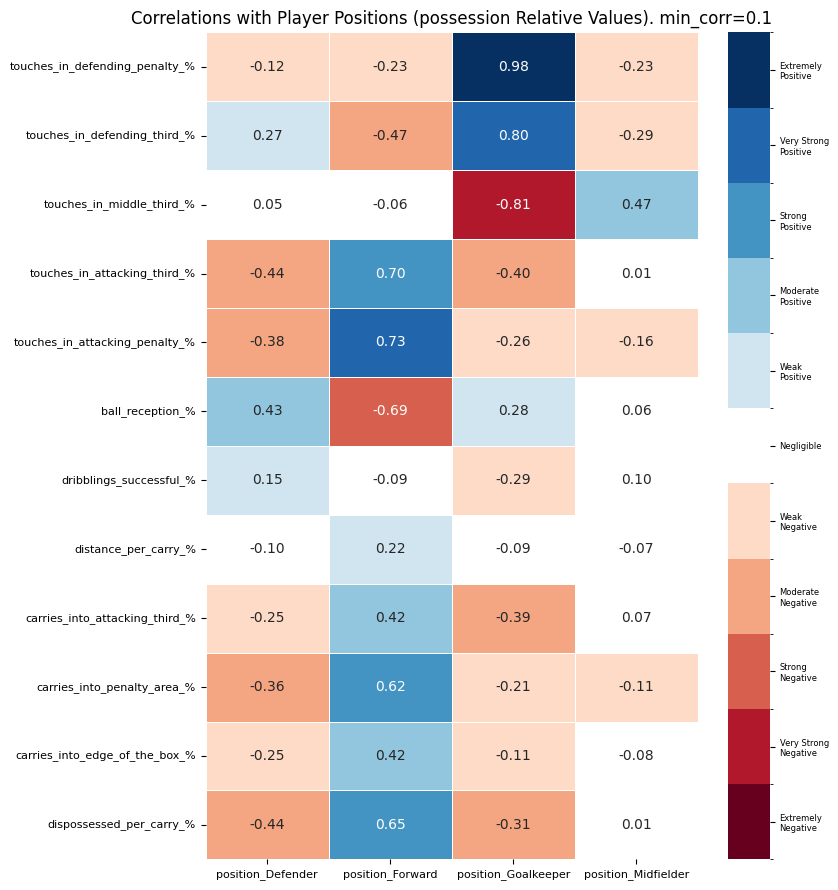

(12, 4)


In [7]:
df_columns_relative_values = possession[columns_relative_values].round(4)
df_columns_relative_values['position'] = possession['position'].astype('category')

min_corr = 0.1
position_corr = compute_position_correlations(df_columns_relative_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr, title=f'Correlations with Player Positions (possession Relative Values). min_corr={min_corr}')
print(position_corr.shape)

## Absolute Values

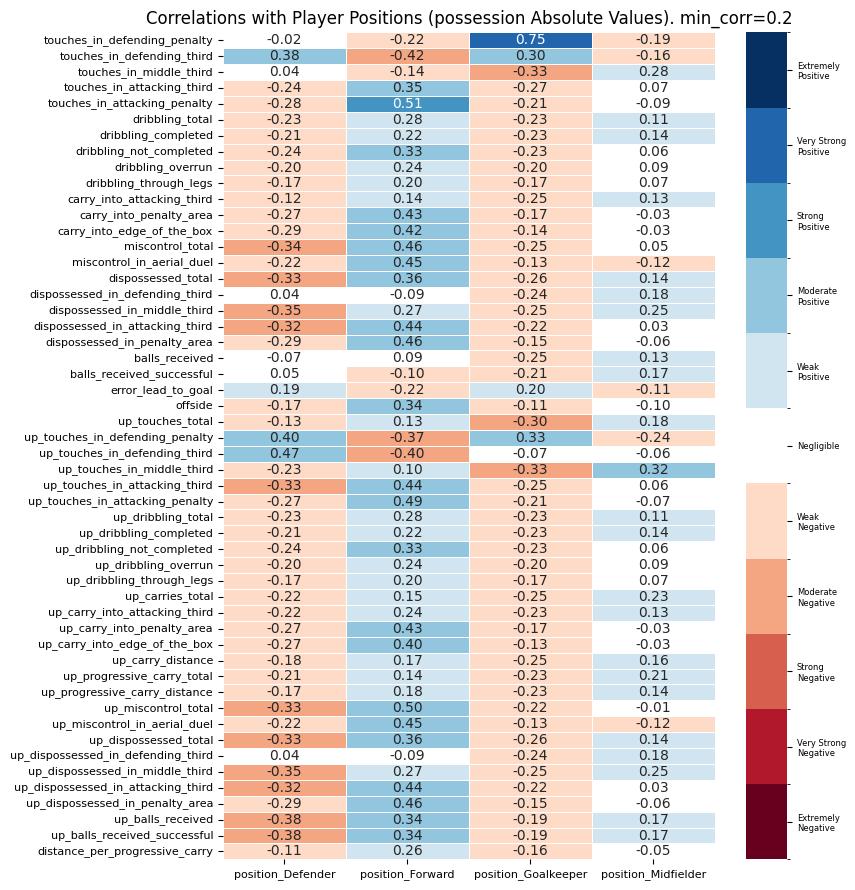

(52, 4)


In [10]:
df_absolute_values = possession[columns_absolute_values].round(4)
df_absolute_values['position'] = possession['position'].astype('category')

min_corr=0.2
position_corr = compute_position_correlations(df_absolute_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr,title=f'Correlations with Player Positions (possession Absolute Values). min_corr={min_corr}')
print(position_corr.shape)